<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/Optimizaion_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shubham Sharma

SID: 862394567

Question 1) (3 pts) Setup your code so that you can run multiple MNIST models for varying choices of k and p
automatically, Specifically, you need two for loops (one for k and one for p) and within the loop, you
call PyTorch/TensorFlow.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

def load_data():
    """ Loading MNIST dataset"""
    train_data = datasets.MNIST(root='./data', train=True, download=True)
    test_data = datasets.MNIST(root='./data', train=False, download=True)

    """Selecting 10000 samples having 1,000 from each class"""
    indices = []
    for i in range(10):
        indices.extend(np.where(train_data.targets == i)[0][:1000])
    train_data.data = train_data.data[indices]
    train_data.targets = train_data.targets[indices]

    """Transforming the the input data as HW2"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.Lambda(lambda x: torch.cat([x.view(-1), torch.tensor([1.0])]))  # add bias
    ])


    train_data.transform = transform
    test_data.transform = transform
    """Creating dataloader after transforming"""
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

    return train_loader, test_loader


class Net(nn.Module):
    def __init__(self, k, p):
        super(Net, self).__init__()
        """K as neural net width"""
        self.fc1 = nn.Linear(785, k)
        self.fc2 = nn.Linear(k, 10)
        """p as droupout Rate"""
        self.dropout_rate = p

    """Feed forward function"""
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = nn.functional.dropout(x, p=self.dropout_rate, training=self.training)
        x = nn.functional.log_softmax(self.fc2(x), dim=1)
        return x


"""Ecaluation function"""
def evaluate_model(model, test_loader):
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    model.train()
    return correct_test / total_test


def plot_results(train_accs, test_accs, network_widths, dropout_rates):
    plt.figure(figsize=(10,8))
    """Training plot"""
    plt.subplot(2, 1, 1)
    for p in dropout_rates:
        plt.plot(network_widths, train_accs[p], label=f'p={p}')
    plt.title('Training Accuracy')
    plt.xlabel('Network Width')
    plt.ylabel('Accuracy')
    plt.legend()

    """Test Plot"""
    plt.subplot(2, 1, 2)
    for p in dropout_rates:
        plt.plot(network_widths, test_accs[p], label=f'p={p}')
    plt.title('Test Accuracy')
    plt.xlabel('Network Width')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()




Question 2)(7 pts) Pick the width grid K = [1, 5, 10, 20, 40] and dropout grid P = [0.1, 0.5, 1.0]. Run MNIST models
over these grids with Adam optimizer for 80 epochs. Store the test/train accuracy and loss.
• Fix p = 1.0 which is the case of “no dropout regularization”. Plot the test and training accuracy
as a function of k. As k increases, does the performance improve? At what k, training accuracy
becomes 100%?
• Plot the training accuracy as a function of k and for different p ∈ P on the same plot. What is the
role of p on training accuracy? When p is smaller, is it easier to optimize or more difficult? For
each choice of p, determine at what choice of k, training accuracy becomes 100%.
• Plot the test accuracy as a function of k and for different p ∈ P on the same plot. Does dropout
help with the test accuracy? For which (k, p) configuration do you achieve the best test accuracy?

100%|██████████| 9912422/9912422 [00:00<00:00, 112154300.22it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94049451.73it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 88152183.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20843029.29it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

p=0.1, k=1, Epoch=0, Train Loss=2.36574125289917, Train Acc=0.0625
p=0.1, k=1, Epoch=1, Train Loss=2.5111351013183594, Train Acc=0.0
p=0.1, k=1, Epoch=2, Train Loss=2.360319137573242, Train Acc=0.0
p=0.1, k=1, Epoch=3, Train Loss=2.2588348388671875, Train Acc=0.0625
p=0.1, k=1, Epoch=4, Train Loss=2.2953286170959473, Train Acc=0.0
p=0.1, k=1, Epoch=5, Train Loss=2.319498300552368, Train Acc=0.0625
p=0.1, k=1, Epoch=6, Train Loss=2.3046462535858154, Train Acc=0.25
p=0.1, k=1, Epoch=7, Train Loss=2.308502197265625, Train Acc=0.0625
p=0.1, k=1, Epoch=8, Train Loss=2.3062586784362793, Train Acc=0.0
p=0.1, k=1, Epoch=9, Train Loss=2.3012490272521973, Train Acc=0.0625
p=0.1, k=1, Epoch=10, Train Loss=2.305112838745117, Train Acc=0.0625
p=0.1, k=1, Epoch=11, Train Loss=2.304582357406616, Train Acc=0.0
p=0.1, k=1, Epoch=12, Train Loss=2.3022804260253906, Train Acc=0.0625
p=0.1, k=1, Epoch=13, Train Loss=2.30332708358764

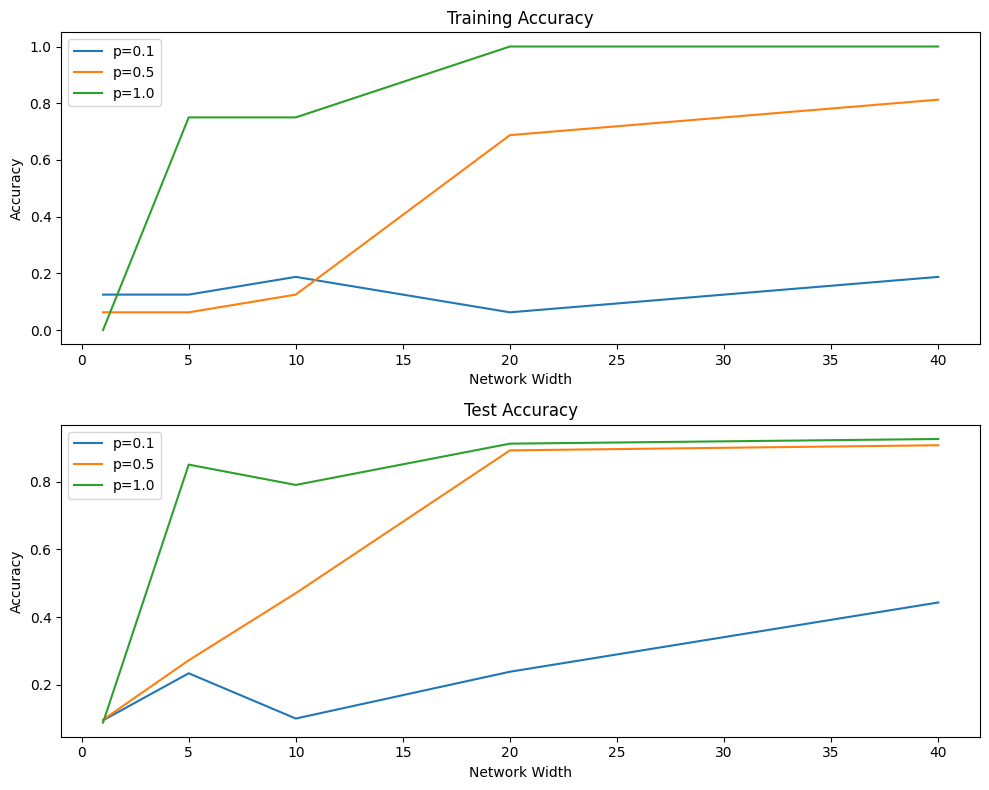

In [ ]:
"""Training method"""
def train_model(k, p, train_loader):
    """Referance of NN model"""
    model = Net(k, 1-p)

    """Loss criterion"""
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters())

    for epoch in range(80):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

        """Loss and accuracy for each epoch"""
        _, predicted = torch.max(output.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        print(f'p={p}, k={k}, Epoch={epoch}, Train Loss={loss.item()}, Train Acc={correct / total}')

    return model, correct / total

def Classifier1():
    train_loader, test_loader = load_data()


    network_widths = [1, 5, 10, 20, 40]
    dropout_rates = [0.1, 0.5, 1.0]

    train_accs = {p: [] for p in dropout_rates}
    test_accs = {p: [] for p in dropout_rates}

    for p in dropout_rates:
        for k in network_widths:
            model, train_acc = train_model(k, p, train_loader)
            test_acc = evaluate_model(model, test_loader)
            train_accs[p].append(train_acc)
            test_accs[p].append(test_acc)
            print(f'Final Test Acc for p={p}, k={k} is {test_acc}')

    plot_results(train_accs, test_accs, network_widths, dropout_rates)



Classifier1()



Answer2)
*  Yes, in case of p = 1.0 as the k values increases performance increases. Accuracy for k=1 is 8.92%, k = 5 is 85.02, k =10 is 79.02, k=20 is 91.2 and k = 40 is 92.57. As per the above output Training accuracy was 100% for k 5,10,20,40. That means except for k=1 for all other k values Training accuracy touches 100% for some epoch.
*   We are using "p" as the dropout rate, where dropout is a regularization technique used to prevent overfitting in neural networks. As mentioned in the question, when p = 1, dropout is effectively turned off (no dropout regularization), which might lead to overfitting. On the other hand, when p is close to 0.0, the model is heavily penalized, potentially resulting in underfitting. Therefore, from the graph above, we can observe that for p = 1, the accuracy increases rapidly as the k values increase, and the training accuracy reaches close to 100% for k values of 10, 20, and 40. Conversely, for p = 0.5, the graph is relatively below that of p = 1, and the training accuracy is not close to 100% due to regularization. When the dropout rate is p = 0.1, the model is heavily penalized, causing many neurons to be turned off during the forward pass, resulting in underfitting. This is why we obtain the lowest training accuracy in this case. As the p values decreases it is difficult to optimize.

From the above output the training accuracy reaches 100% only in case of p = 1 for k 5, 10, 20, 40.



* Yes, Dropout regularization can help improve test accuracy by preventing overfitting and promoting better generalization of the model. For p=1 and k =40 get the maximum test accuracy 93.38%










Question 3) . (7 pts) We will spice up the problem by adding some noise to labels. Pick 40% of the training examples
at random. Assign their labels at random to another value from 0 to 9. For instance, if the original
image is 0 and its label is 0, then you will assign its label to a number from 1 to 9 at random. Thus
60% of the training examples remain correct and 40% will have incorrect labels. Repeat the previous
step with this noisy dataset.

p=0.1, k=1, Epoch=0, Train Loss=2.4307146072387695, Train Acc=0.3125
p=0.1, k=1, Epoch=1, Train Loss=2.480626106262207, Train Acc=0.0
p=0.1, k=1, Epoch=2, Train Loss=2.3271331787109375, Train Acc=0.1875
p=0.1, k=1, Epoch=3, Train Loss=2.349533796310425, Train Acc=0.0625
p=0.1, k=1, Epoch=4, Train Loss=2.3461437225341797, Train Acc=0.0
p=0.1, k=1, Epoch=5, Train Loss=2.3125836849212646, Train Acc=0.125
p=0.1, k=1, Epoch=6, Train Loss=2.290682554244995, Train Acc=0.1875
p=0.1, k=1, Epoch=7, Train Loss=2.3087120056152344, Train Acc=0.25
p=0.1, k=1, Epoch=8, Train Loss=2.2968974113464355, Train Acc=0.125
p=0.1, k=1, Epoch=9, Train Loss=2.3065242767333984, Train Acc=0.0
p=0.1, k=1, Epoch=10, Train Loss=2.3021035194396973, Train Acc=0.0625
p=0.1, k=1, Epoch=11, Train Loss=2.301624059677124, Train Acc=0.125
p=0.1, k=1, Epoch=12, Train Loss=2.3006649017333984, Train Acc=0.125
p=0.1, k=1, Epoch=13, Train Loss=2.3054277896881104, Train Acc=0.0625
p=0.1, k=1, Epoch=14, Train Loss=2.30874776840209

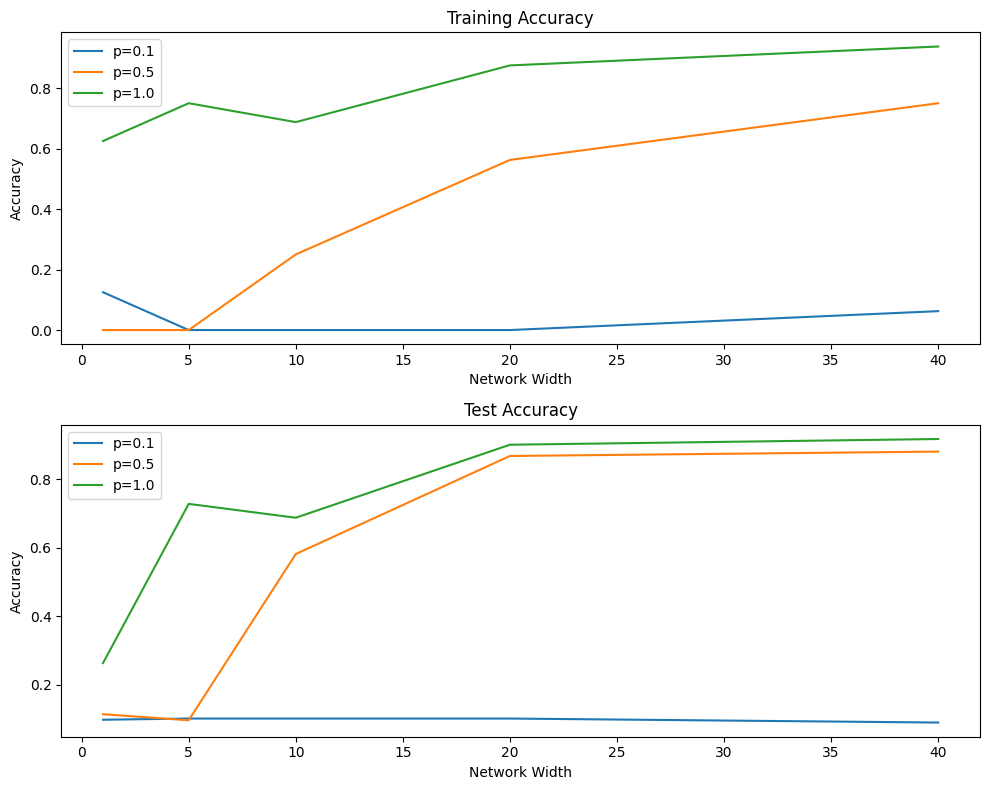

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np




def add_label_noise(labels, noise_ratio):
    noisy_labels = labels.clone()
    num_noisy_labels = int(len(labels) * noise_ratio)
    noisy_indices = torch.randperm(len(labels))[:num_noisy_labels]
    random_labels = torch.randint(low=0, high=10, size=(num_noisy_labels,))
    noisy_labels[noisy_indices] = random_labels
    return noisy_labels


def train_model(k, p, train_loader):
    model = Net(k, 1-p)
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters())

    for epoch in range(80):
        for images, labels in train_loader:
            optimizer.zero_grad()
            noisy_labels = add_label_noise(labels, 0.4)
            output = model(images)
            loss = criterion(output, noisy_labels)
            loss.backward()
            optimizer.step()

        _, predicted = torch.max(output.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        print(f'p={p}, k={k}, Epoch={epoch}, Train Loss={loss.item()}, Train Acc={correct / total}')

    return model, correct / total


def Classifier2():
    train_loader, test_loader = load_data()

    network_widths = [1, 5, 10, 20, 40]
    dropout_rates = [0.1, 0.5, 1.0]

    train_accs = {p: [] for p in dropout_rates}
    test_accs = {p: [] for p in dropout_rates}

    for p in dropout_rates:
        for k in network_widths:
            model, train_acc = train_model(k, p, train_loader)
            test_acc = evaluate_model(model, test_loader)
            train_accs[p].append(train_acc)
            test_accs[p].append(test_acc)
            print(f'Final Test Acc for p={p}, k={k} is {test_acc}')

    plot_results(train_accs, test_accs, network_widths, dropout_rates)


Classifier2()


Answer 3)
*  Yes, in case of p = 1.0 as the k values increases performance increases. Accuracy for k=1 is 26.31%, k = 5 is 72.83, k =10 is 68.78, k=20 is 90.12 and k = 40 is 91.79. As per the above output Training accuracy was 100% for k 20,40.

*   We are using "p" as the dropout rate, where dropout is a regularization technique used to prevent overfitting in neural networks. As mentioned in the question, when p = 1, dropout is effectively turned off (no dropout regularization), which might lead to overfitting. On the other hand, when p is close to 0.0, the model is heavily penalized, potentially resulting in underfitting. Therefore, from the graph above, we can observe that for p = 1, the accuracy increases rapidly as the k values increase, and the training accuracy reaches close to 100% for k values of 20, and 40. Conversely, for p = 0.5, the graph is relatively below that of p = 1, and the training accuracy is not close to 100% due to regularization. However, since this time the problem was complex because of regularization there in no significant difference in test accuracy.
When the dropout rate is p = 0.1, the model is heavily penalized, causing many neurons to be turned off during the forward pass, resulting in underfitting. This is why we obtain the lowest training accuracy in this case. As the p values decreases it is difficult to optimize.

From the above output the training accuracy reaches 100% only in case of p = 1 for k 20, 40.



* Yes, Dropout regularization can help improve test accuracy by preventing overfitting and promoting better generalization of the model. For p=1 and k =40 get the maximum test accuracy 91.79%










Question 4). (3 pts) Comment on the differences between Step 2 and Step 3. How does noise change things? For
which setup dropout is more useful?

Answer 4) In Step 2, the problem is comparatively simpler than Step 3 since in Step 3, we are providing noisy labeled data during training, which makes the problem more complex.

With noisy labels, the model may face greater difficulty in learning, particularly when the level of noise is high. In such cases, techniques like dropout can be useful in preventing overfitting to incorrect labels, thereby enhancing generalization. This is the reason why we achieve significantly higher test accuracy when the noise level (p) is set to 0.5 for the noisy labels.